Step 1: Import Required Libraries

In [ ]:
import numpy as np
import random
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

Step 2: Define the Environment

In [ ]:
# Grid Size
grid_size = 5
rewards = np.full((grid_size, grid_size), -1)  # Default reward -1
rewards[4, 4] = 100  # Goal reward

# Actions: 0 = Up, 1 = Down, 2 = Left, 3 = Right
actions = {0: (-1, 0), 1: (1, 0), 2: (0, -1), 3: (0, 1)}

# Function to check if move is valid
def is_valid_move(x, y):
    return 0 <= x < grid_size and 0 <= y < grid_size

Step 3: Define the DQN Model

In [ ]:
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 24)
        self.fc2 = nn.Linear(24, 24)
        self.fc3 = nn.Linear(24, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

Step 4: Define the Training Loop

In [ ]:
# DQN Parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate
episodes = 500  # Training iterations
input_dim = grid_size * grid_size  # Input dimension
output_dim = len(actions)  # Output dimension

# Initialize DQN
dqn = DQN(input_dim, output_dim)
optimizer = optim.Adam(dqn.parameters(), lr=alpha)
criterion = nn.MSELoss()

for episode in range(episodes):
    x, y = 0, 0  # Start position
    state = np.zeros((grid_size, grid_size))
    state[x, y] = 1
    state = torch.tensor(state.flatten(), dtype=torch.float32)

    while (x, y) != (4, 4):  # Until goal is reached
        if random.uniform(0, 1) < epsilon:
            action = random.choice(list(actions.keys()))
        else:
            with torch.no_grad():
                action = torch.argmax(dqn(state)).item()

        dx, dy = actions[action]
        new_x, new_y = x + dx, y + dy

        if is_valid_move(new_x, new_y):
            reward = rewards[new_x, new_y]
            next_state = np.zeros((grid_size, grid_size))
            next_state[new_x, new_y] = 1
            next_state = torch.tensor(next_state.flatten(), dtype=torch.float32)

            with torch.no_grad():
                target = reward + gamma * torch.max(dqn(next_state))
            output = dqn(state)[action]
            loss = criterion(output, target)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            state = next_state
            x, y = new_x, new_y

Step 5: Visualize the Learned Policy

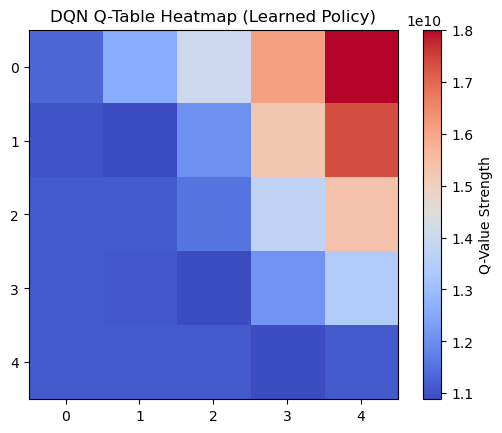

In [ ]:
q_values = np.zeros((grid_size, grid_size, output_dim))
for i in range(grid_size):
    for j in range(grid_size):
        state = np.zeros((grid_size, grid_size))
        state[i, j] = 1
        state = torch.tensor(state.flatten(), dtype=torch.float32)
        q_values[i, j] = dqn(state).detach().numpy()

plt.imshow(np.max(q_values, axis=2), cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Q-Value Strength")
plt.title("DQN Q-Table Heatmap (Learned Policy)")
plt.show()

A heatmap showing how well the agent has learned to navigate to the goal!